# dependencias
import sys
#!conda install --yes --prefix {sys.prefix} \
!{sys.executable} -m pip install \
    numpy \
    pandas \
    pandas_datareader \
    pandas_finance \
    matplotlib \
    seaborn \
    scipy \
    scikit-learn \
    statsmodels \
    sweetviz \
    sklearn \
    category_encoders \
    requests \
    python-binance --upgrade --no-cache-dir \
    yfinance --upgrade --no-cache-dir \
    quantstats --upgrade --no-cache-dir \
    yahoofinancials --upgrade --no-cache-dir --user \
    investpy --upgrade --no-cache-dir

In [1]:
# manipulação de dados
import numpy as np
import pandas as pd
import pandas_datareader.data as web

In [ ]:
%matplotlib inline
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('FB')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

In [2]:
# para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

Matplotlib is building the font cache; this may take a moment.


In [3]:
# para modelagem
import sklearn.model_selection as ms
import sklearn.metrics as metrics
import sklearn.svm as svm
import sklearn.neighbors as nb
import sklearn.ensemble as ens
import sklearn.linear_model as lm
import sklearn.tree as tree
import sklearn.naive_bayes as nb
import sklearn.discriminant_analysis as dac
import sklearn.gaussian_process as gp
import sklearn.kernel_ridge as kr
import sklearn.kernel_approximation as ka
import sklearn.decomposition as dc
import sklearn.feature_selection as fs
import sklearn.pipeline as pl
import sklearn.compose as cp
import sklearn.preprocessing as pp
import sklearn.impute as imp
import sklearn.base as base
import sklearn.utils as utils
import sklearn.exceptions as exc
import sklearn.utils.estimator_checks as ec
import sklearn.utils.validation as val
import sklearn.utils.metaestimators as meta
import sklearn.utils.multiclass as mc
import sklearn.utils.class_weight as cw
import sklearn.utils.validation as val
import sklearn.utils.metaestimators as meta


In [4]:
# transforma variáveis categóricas
import category_encoders as ce

In [5]:
import yfinance as yf
yf.pdr_override()

In [6]:
# settings
sns.set()
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
plt.style.use("classic")
# %load_ext nb_black

In [7]:
ibov = web.get_data_yahoo('^BVSP', '2007-01-01', '2021-11-12')

[*********************100%***********************]  1 of 1 completed


In [8]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-02,44476.0,45388.0,44476.0,45383.0,45383.0,75560200
2007-01-03,45379.0,45379.0,44284.0,44445.0,44445.0,122372800
2007-01-04,44442.0,44442.0,43623.0,44020.0,44020.0,86577000
2007-01-05,44019.0,44081.0,42160.0,42245.0,42245.0,164055000
2007-01-08,42249.0,42926.0,42144.0,42830.0,42830.0,114007100


In [9]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-05,103412.0,105555.0,103412.0,104824.0,104824.0,12595000
2021-11-08,104824.0,105679.0,104182.0,104781.0,104781.0,9358000
2021-11-09,104783.0,106674.0,104783.0,105535.0,105535.0,11021200
2021-11-10,105535.0,107407.0,105140.0,105968.0,105968.0,12277400
2021-11-11,105988.0,108669.0,105988.0,107725.0,107725.0,12661400


<AxesSubplot:xlabel='Date'>

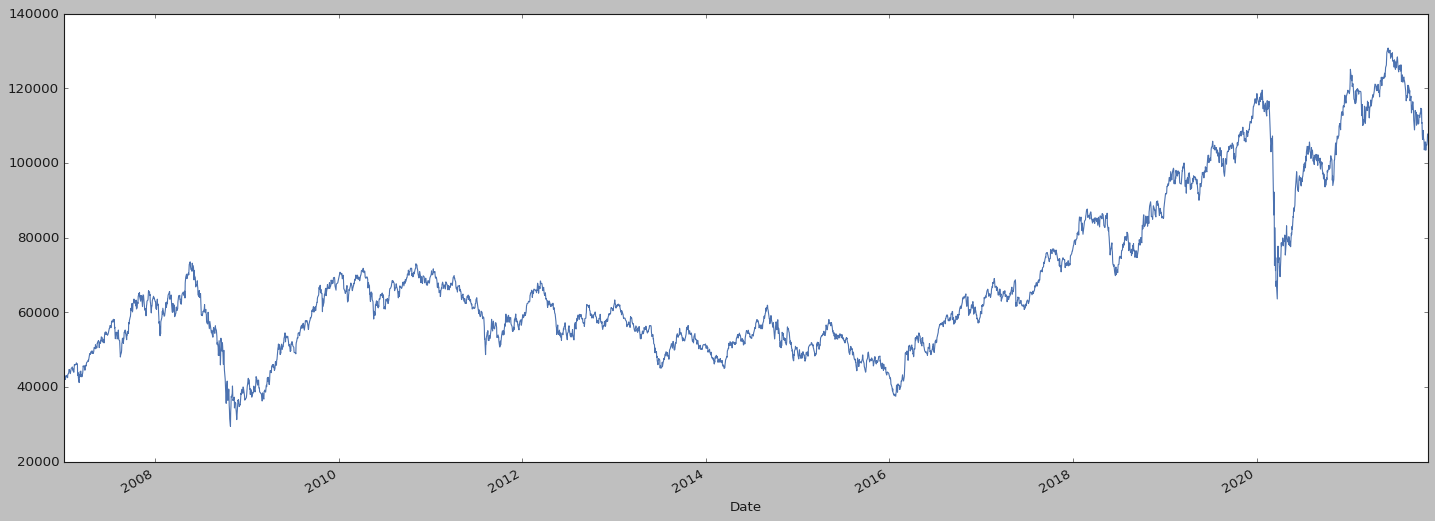

In [10]:
ibov["Close"].plot(figsize=(22,8))

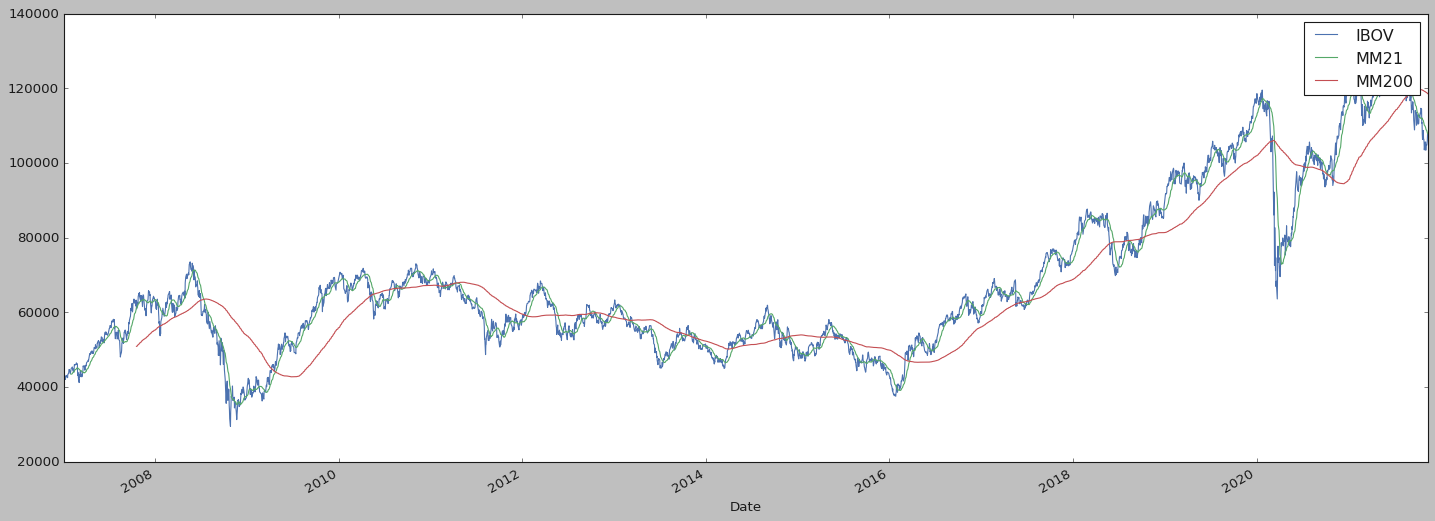

In [11]:
ibov["Close"].plot(figsize=(22,8), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

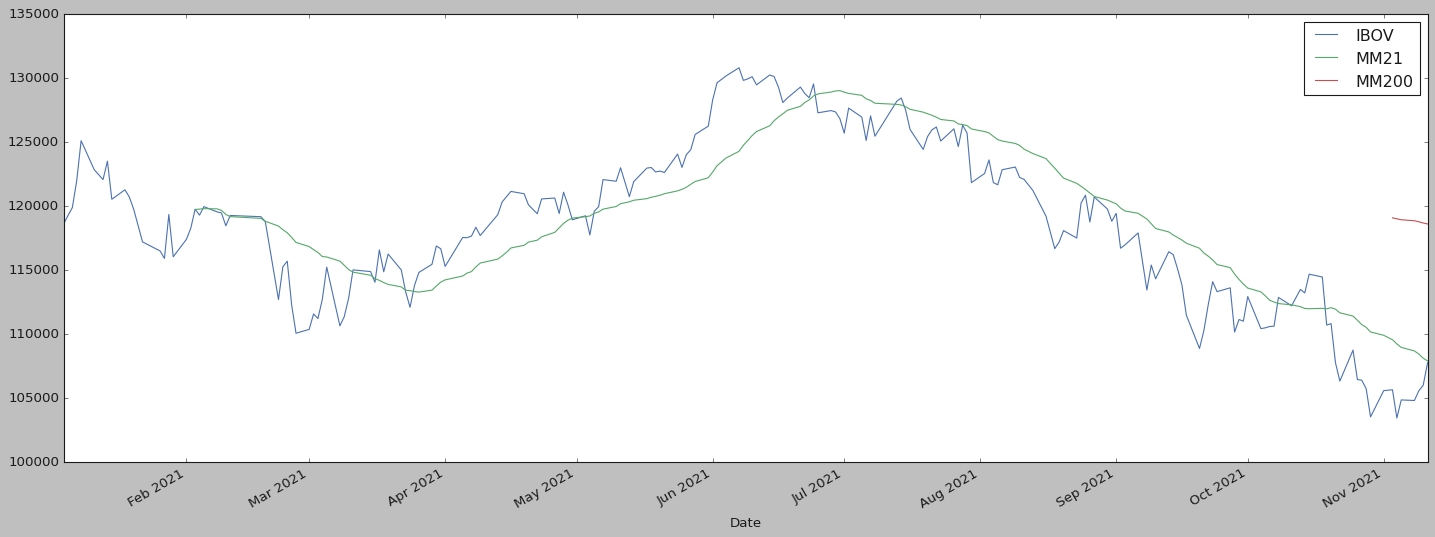

In [12]:
ibov_fatiado = ibov[ibov.index.year == 2021]
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

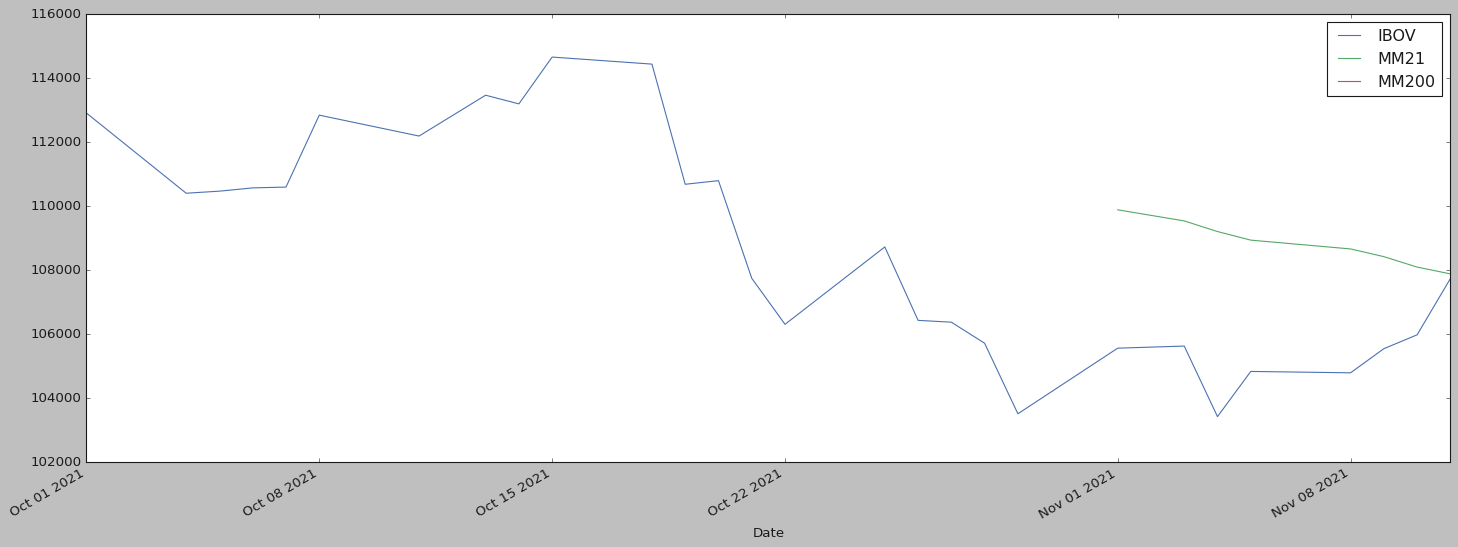

In [13]:
ibov_fatiado = ibov[(ibov.index.year >= 2021) & (ibov.index.month >= 10)]
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [14]:
ibov.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3.662000e+03
mean,67825.345440,68520.827690,67130.128891,67842.905243,67842.905243,8.304125e+06
std,21390.950801,21516.398861,21265.889340,21402.256517,21402.256517,2.204325e+07
min,29438.000000,31480.000000,29435.000000,29435.000000,29435.000000,0.000000e+00
25%,53155.750000,53792.000000,52640.250000,53157.000000,53157.000000,2.306050e+06
50%,61724.500000,62295.500000,61111.500000,61722.500000,61722.500000,3.450150e+06
75%,75754.750000,76497.750000,74970.500000,75831.250000,75831.250000,5.008800e+06
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.322653e+08


In [15]:
ibov.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
# dashboard
reporte = sv.analyze(ibov)
reporte.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
features = ["Open", "Close"]
target = "Volume"

X = ibov[features]
y = ibov[target]

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=999)

In [ ]:
# se tiver var categórica
# cat_features = ["Job", "Housing"]
#encoder = ce.OneHotEncoder(cols=cat_features)
#X_train = encoder.fit_transform(X_train)
#X_test = encoder.tranform(X_test)

In [18]:
clf_RF = ens.RandomForestClassifier()
clf_RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# aplica no test
y_pred = clf_RF.predict(X_test)
y_pred

In [ ]:
# métricas de avaliação
m_ac = metrics.accuracy_score(y_test, y_pred)
print("Acurácia: {}".format(m_ac))

m_sc = metrics.f1_score(y_test, y_pred)
print("F1 Score: {}".format(m_sc))

# confusion_matrix()
